In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def zero_pad(X, pad):
    #dimensions of X - (batch_size, height, width, no.of channels) note: no padding requires in 0th and 3rd dimensions.
    pad_X = np.pad(X,((0,0),(pad,pad),(pad,pad),(0,0)),'constant',constant_values=0 )
    return pad_X


Before padding shape: (4, 3, 3, 3)
after padding shape:  (4, 7, 7, 3)


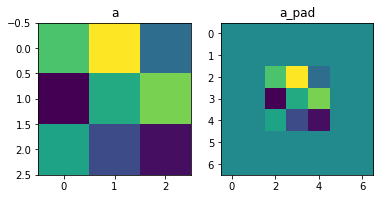

In [5]:
a = np.random.randn(4,3,3,3)
print("Before padding shape:",a.shape)
a_pad = zero_pad(a,2)
print("after padding shape: ",a_pad.shape)
#print("a[1,1] = ",a[1,1])
#print("a_pad[1,1] = ",a_pad[1,1])

fig, axarr = plt.subplots(1,2)
axarr[0].set_title("a")
axarr[0].imshow(a[0,:,:,0])
axarr[1].set_title("a_pad")
axarr[1].imshow(a_pad[0,:,:,0])

In [18]:
def conv_single_step(a_slice, W, b):
    z = np.multiply(a_slice, W) + b
    S = np.sum(z)
    return S

a_slice = np.random.randn(4,4,3)
W = np.random.randn(4,4,3)
b = np.random.randn(1,1,1)
Z = conv_single_step(a_slice, W, b)
print("After one step of convolution: ",Z)


After one step of convolution:  29.68975484857136


In [56]:
def convolution_forward_prop(A_prev, W, b, hyperparameters):
    #get input dimensions
    (i_samples, i_height, i_width, i_ch) = A_prev.shape
    #get filter dimensions
    (f_height, f_width, f_ch, n_filters) = W.shape
    
    assert(i_ch == f_ch)
        
    pad = hyperparameters['padding']
    stride = hyperparameters['stride']
    o_height = int((i_height - f_height + 2*pad)/stride) + 1
    o_width  = int((i_width - f_width + 2*pad)/stride) + 1
    print("Output height and width: ", o_height, o_width)
    a_prev_padded = zero_pad(A_prev, pad)
    print("dimensions of A_prev after padding: ",a_prev_padded.shape)
    out = np.zeros((i_samples, o_height, o_width, n_filters))
    for i in range(i_samples):
        a_prev = a_prev_padded[i]
        for h in range(i_height):
            for w in range(i_width):
                for c in range(n_filters):
                    vert_start = h * stride
                    vert_end = vert_start + f_height
                    horiz_start = w * stride
                    horiz_end = horiz_start + f_width
                    a_slice = a_prev[vert_start:vert_end, horiz_start: horiz_end,:]
                    out[i, h, w, c] = conv_single_step(a_slice, W[...,c],b[...,c])
    
    #making sure output volume is correct
    assert(out.shape==(i_samples,o_height, o_width, n_filters))
    cache = (A_prev, W, b, hyperparameters)
    return out,cache


In [62]:
A_prev = np.random.randn(10,4,4,3)
W = np.random.randn(2,2,3,8)
b = np.random.randn(1,1,1,8)
hyperparameters = {'padding': 2, 'stride':1}
out,cache = convolution_forward_prop(A_prev, W,b, hyperparameters)
print("shape of out:",out.shape)
print("out's mean: ",np.mean(out))
print(out[0][1][2][3])

Output height and width:  7 7
dimensions of A_prev after padding:  (10, 8, 8, 3)
shape of out: (10, 7, 7, 8)
out's mean:  0.1962323907779711
-2.9323823033305247


In [80]:
def forward_pooling(A_prev, hyperparameters, mode="max"):
    (i_samples, i_height, i_width, i_ch) = A_prev.shape
    f = hyperparameters['f']
    stride = hyperparameters['stride']
    o_height = int((i_height - f)/stride + 1)
    o_width = int((i_width - f)/stride + 1)
    print("o_height: ",o_height)
    print("o_width: ",o_width)
    A = np.zeros((i_samples, o_height, o_width, i_ch))
    for n in range(i_samples):
        for h in range(i_height):
            for w in range(i_width):
                for ch in range(i_ch):
                    vert_start = h*stride
                    vert_end = vert_start + f
                    horiz_start = w*stride
                    horiz_end = horiz_start + f
                    a_slice = A_prev[n,vert_start:vert_end,horiz_start:horiz_end,ch]
                    print(a_slice.shape)
                    if mode=="max":
                        A[n,h,w,ch] = np.max(a_slice)
                    elif mode=="avg":
                        A[n,h,w,ch] = np.mean(a_slice)
    cache = (A_prev, hyperparameters)
    return A, cache


In [81]:
A_prev = np.random.randn(2,4,4,3)
hyperparameters = {'f':4, 'stride':1}
out = forward_pooling(A_prev, hyperparameters)

o_height:  1
o_width:  1
(4, 4)
(4, 4)
(4, 4)
(4, 3)


IndexError: index 1 is out of bounds for axis 2 with size 1